Wczytywanie obrazka i progowanie

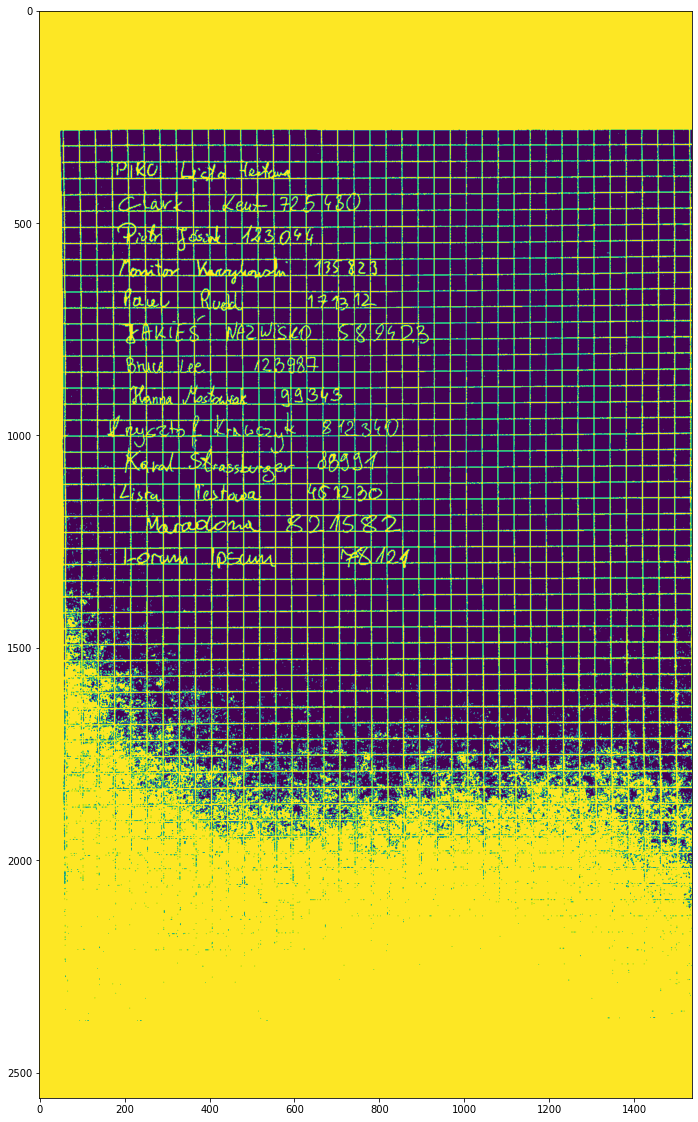

In [17]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('data_wieloch/img_1.jpg',0)
# thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
ret, thresh = cv2.threshold(image, 145, 255, cv2.THRESH_BINARY_INV)
# bw = adaptiveThreshold(img, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, -2)
plt.figure(figsize=(20,20))
plt.imshow(thresh)
plt.show()

Poziome linie

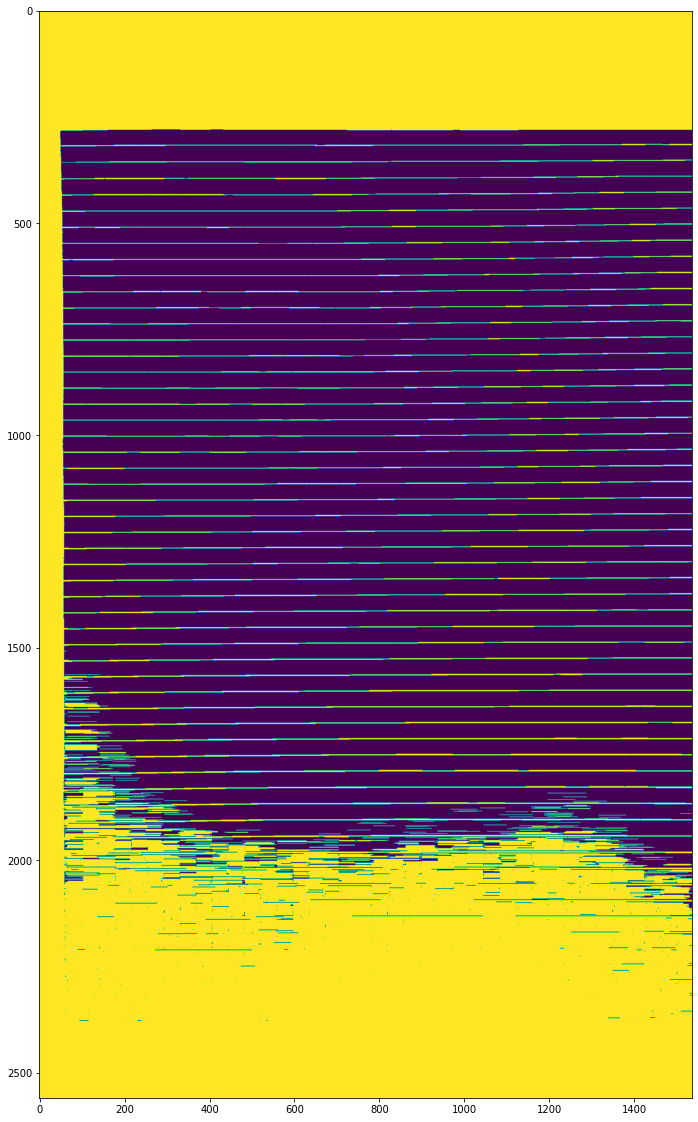

In [18]:
horizontal_size = int(thresh.shape[1] / 30)
horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_structure)
# horizontal = erode(horizontal, horizontal_structure, (-1, -1))
# horizontal = dilate(horizontal, horizontal_structure, (-1, -1))
# horizontal = dilate(horizontal,np.ones((5, 5), np.uint8),iterations=1)

plt.figure(figsize=(20,20))
plt.imshow(horizontal_mask)
plt.show()

Pionowe linie

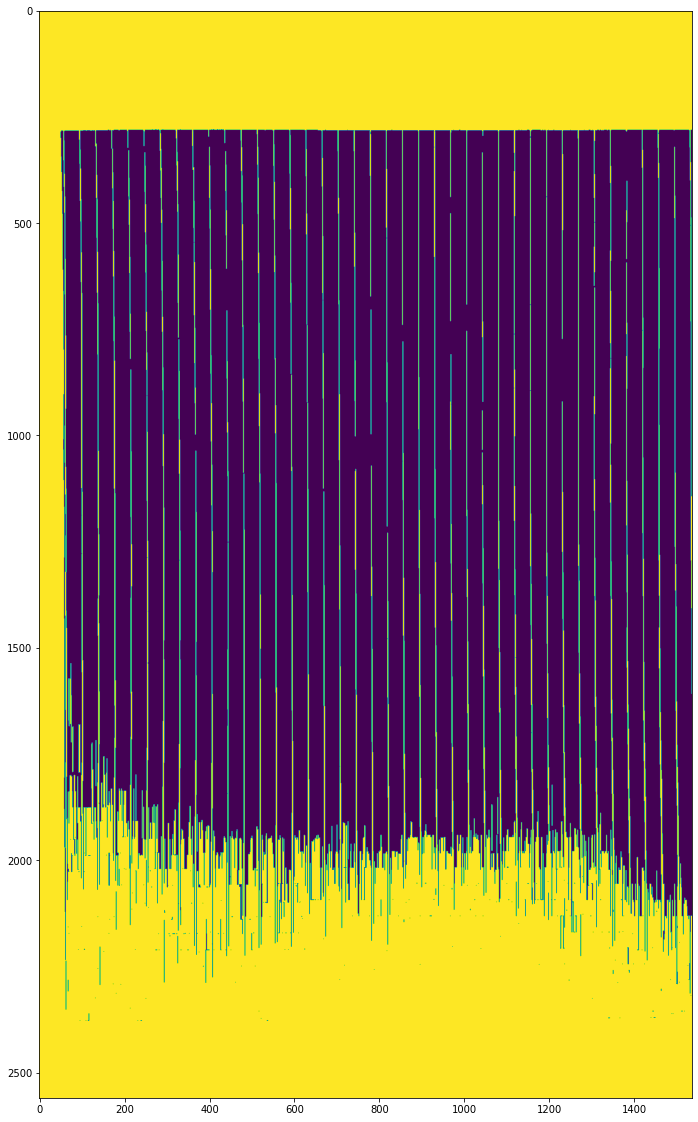

In [19]:
vertical_size = int(thresh.shape[0] / 30)
vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (2, vertical_size))
vertical_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_structure)
# vertical = erode(vertical, vertical_structure, (-1, -1))
# vertical = dilate(vertical, vertical_structure, (1, -1))
# vertical = dilate(vertical,np.ones((5, 5), np.uint8),iterations=1)

plt.figure(figsize=(20, 20))
plt.imshow(vertical_mask)
plt.show()

Usuwanie masek i naprawianie przycięć

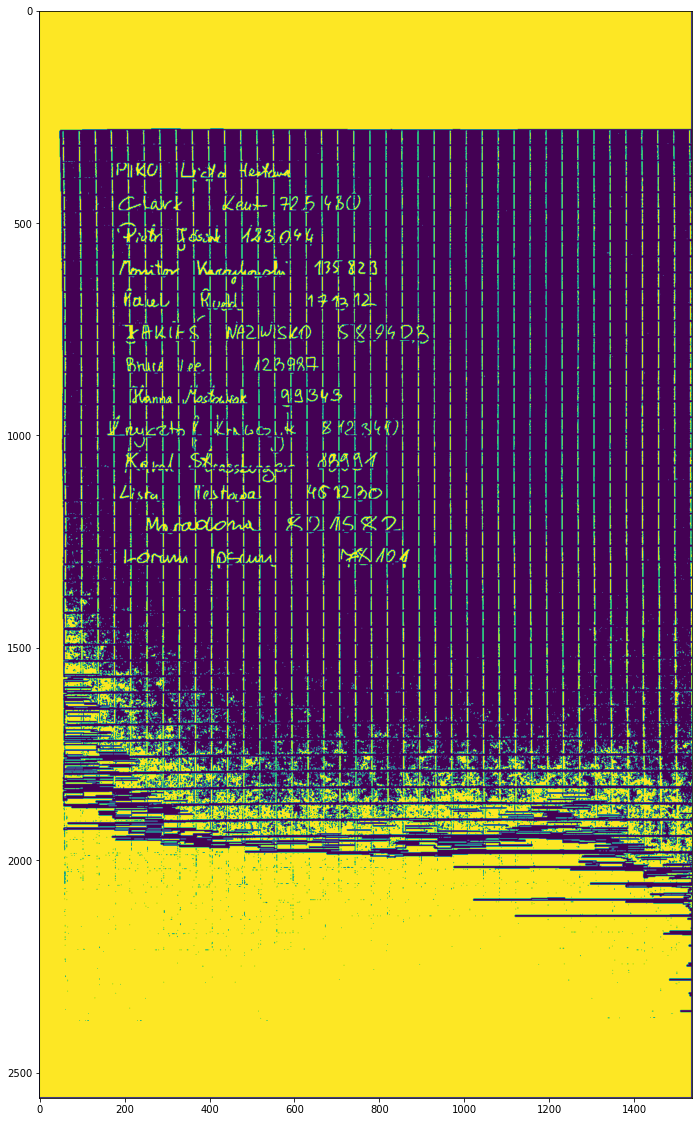

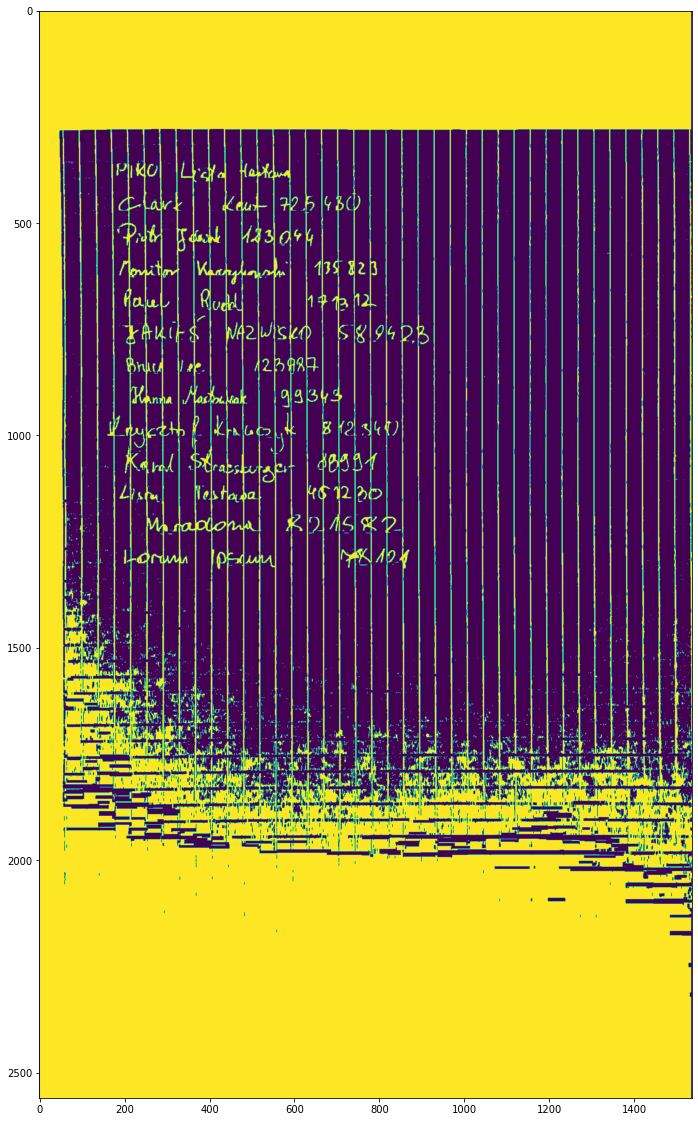

In [20]:
# Remove horizontal
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
# detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=10)
detected_lines = horizontal_mask
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(thresh)
plt.show()

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 0 + cv2.morphologyEx(0 + thresh, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.figure(figsize=(20, 20))
plt.imshow(result)
plt.show()